In [1]:
from IPython.display import display, Image
import pandas
import json
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.width', 1000)


In [2]:

# Use Python's JSON lib, because Pandas doesn't provide
# an option to not cast floats.
# This is a problem when you have discrete categories
# (in this case, severity 1.7) that Pandas introduces
# floating-point drift to.
cves = None
for i in range(2,20):
	path = f'./data/nvdcve-1.1-20{i:02}.json'
	with open(path, 'r') as f:
		print(f'Loading {path} ... ({i-1} of {len(range(2,20))})')
		data = json.load(f)

	if cves is None: cves = pandas.DataFrame(data)
	else: cves = cves.append(pandas.DataFrame(data))
	print(f'Loaded {path}. New shape: {cves.shape}')
# cve20022 = pandas.read_json('./data/nvdcve-1.1-2002.json', dtype=False)
# iseq = cve2002==cve20022
# for col in iseq.columns:
# 	print(iseq[col].value_counts())

# #%%
# a = str(cve2002[cve2002['CVE_Items'] != cve20022['CVE_Items']].iloc[0,5])

# #%%
# b = str(cve20022[cve2002['CVE_Items'] != cve20022['CVE_Items']].iloc[0,5])

# #%%
# a == b
# b
print(cves.shape)
cves.tail(10)



Loading ./data/nvdcve-1.1-2002.json ... (1 of 18)
Loaded ./data/nvdcve-1.1-2002.json. New shape: (6746, 6)
Loading ./data/nvdcve-1.1-2003.json ... (2 of 18)
Loaded ./data/nvdcve-1.1-2003.json. New shape: (8293, 6)
Loading ./data/nvdcve-1.1-2004.json ... (3 of 18)
Loaded ./data/nvdcve-1.1-2004.json. New shape: (10995, 6)
Loading ./data/nvdcve-1.1-2005.json ... (4 of 18)
Loaded ./data/nvdcve-1.1-2005.json. New shape: (15745, 6)
Loading ./data/nvdcve-1.1-2006.json ... (5 of 18)
Loaded ./data/nvdcve-1.1-2006.json. New shape: (22873, 6)
Loading ./data/nvdcve-1.1-2007.json ... (6 of 18)
Loaded ./data/nvdcve-1.1-2007.json. New shape: (29431, 6)
Loading ./data/nvdcve-1.1-2008.json ... (7 of 18)
Loaded ./data/nvdcve-1.1-2008.json. New shape: (36579, 6)
Loading ./data/nvdcve-1.1-2009.json ... (8 of 18)
Loaded ./data/nvdcve-1.1-2009.json. New shape: (41547, 6)
Loading ./data/nvdcve-1.1-2010.json ... (9 of 18)
Loaded ./data/nvdcve-1.1-2010.json. New shape: (46625, 6)
Loading ./data/nvdcve-1.1-2011

,CVE_data_type,CVE_data_format,CVE_data_version,CVE_data_numberOfCVEs,CVE_data_timestamp,CVE_Items
7939,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7940,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7941,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7942,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7943,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7944,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7945,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7946,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7947,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."
7948,CVE,MITRE,4.0,7949,2019-09-11T07:00Z,"{'cve': {'data_type': 'CVE', 'data_format': 'M..."


In [3]:
normalized = pandas.io.json.json_normalize(cves['CVE_Items'])
del cves


In [4]:
print(normalized.shape)
normalized.head(10)


(129494, 43)


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ID,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore
0,1999-12-30T05:00Z,2010-12-16T05:00Z,CVE,MITRE,4.0,CVE-1999-0001,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.openbsd.org/errata23.html...,"[{'lang': 'en', 'value': 'ip_input.c in BSD-de...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-10-12T04:00Z,2009-01-26T05:00Z,CVE,MITRE,4.0,CVE-1999-0002,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'ftp://patches.sgi.com/support/free/s...,"[{'lang': 'en', 'value': 'Buffer overflow in N...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-04-01T05:00Z,2018-10-30T16:26Z,CVE,MITRE,4.0,CVE-1999-0003,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'ftp://patches.sgi.com/support/free/s...,"[{'lang': 'en', 'value': 'Execute commands as ...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-12-16T05:00Z,2018-10-12T21:29Z,CVE,MITRE,4.0,CVE-1999-0004,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'https://docs.microsoft.com/en-us/sec...,"[{'lang': 'en', 'value': 'MIME buffer overflow...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-07-20T04:00Z,2008-09-09T12:33Z,CVE,MITRE,4.0,CVE-1999-0005,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://sunsolve.sun.com/pub-cgi/retr...,"[{'lang': 'en', 'value': 'Arbitrary command ex...",4.0,"[{'operator': 'OR', 'cpe_match': [{'vulnerable...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1998-07-14T04:00Z,2008-09-09T12:33Z,CVE,MITRE,4.0,CVE-1999-0006,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'ftp://patches.sgi

In [5]:
pre_dropped = normalized.copy()

normalized.dropna(subset=['impact.baseMetricV2.cvssV2.version'], inplace=True)


In [6]:
to_drop = ['CVE-2018-10662', 
			'CVE-2018-10658', 
			'CVE-2018-10659',
			'CVE-2018-10661',
			'CVE-2018-10664',
			'CVE-2018-10663',
			'CVE-2018-10660']
for cve in to_drop:
	print(normalized[normalized['cve.CVE_data_meta.ID']==cve]['configurations.nodes'].iloc[0])
	normalized = normalized[normalized['cve.CVE_data_meta.ID']!=cve]


[{'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:o:axis:a1001_firmware:*:*:*:*:*:*:*:*', 'versionEndExcluding': '1.65.1'}]}, {'operator': 'OR', 'cpe_match': [{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:h:axis:a1001:-:*:*:*:*:*:*:*'}]}]}, {'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:o:axis:a8004-v_firmware:*:*:*:*:*:*:*:*', 'versionEndExcluding': '1.65.2'}]}, {'operator': 'OR', 'cpe_match': [{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:h:axis:a8004-v:-:*:*:*:*:*:*:*'}]}]}, {'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:o:axis:a8105-e_firmware:*:*:*:*:*:*:*:*', 'versionEndExcluding': '1.65.2'}]}, {'operator': 'OR', 'cpe_match': [{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:h:axis:a8105-e:-:*:*:*:*:*:*:*'}]}]}, {'operator': 'AND', 'children': [{'operator': 'OR', 'cpe_match': [{'vulnerable': True, 'cpe23Uri': 'cpe

In [7]:
normalized.isna().sum()


publishedDate                                           0
lastModifiedDate                                        0
cve.data_type                                           0
cve.data_format                                         0
cve.data_version                                        0
cve.CVE_data_meta.ID                                    0
cve.CVE_data_meta.ASSIGNER                              0
cve.problemtype.problemtype_data                        0
cve.references.reference_data                           0
cve.description.description_data                        0
configurations.CVE_data_version                         0
configurations.nodes                                    0
impact.baseMetricV2.cvssV2.version                      0
impact.baseMetricV2.cvssV2.vectorString                 0
impact.baseMetricV2.cvssV2.accessVector                 0
impact.baseMetricV2.cvssV2.accessComplexity             0
impact.baseMetricV2.cvssV2.authentication               0
impact.baseMet

In [8]:
normalized['configurations.nodes'].head(20)


0     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
1     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
2     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
3     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
4     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
5     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
6     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
7     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
8     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
9     [{'operator': 'OR', 'cpe_match': [{'vulnerable...
10    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
11    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
12    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
13    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
14    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
15    [{'operator': 'AND', 'children': [{'operator':...
16    [{'operator': 'OR', 'cpe_match': [{'vulnerable...
17    [{'operator': 'OR', 'cpe_match': [{'vulner

In [9]:
normalized['cve.CVE_data_meta.ID'].tail()


129489    CVE-2019-9974
129490    CVE-2019-9975
129491    CVE-2019-9976
129492    CVE-2019-9977
129493    CVE-2019-9978
Name: cve.CVE_data_meta.ID, dtype: object

In [10]:

# print(normalized['configurations.nodes'][0][0])
# df = pandas.io.json.json_normalize(normalized['configurations.nodes'][0][0]['cpe_match'])
df_1 = normalized.explode('configurations.nodes')
del normalized
def get_from_key(d, key=None, default=None):
	if not isinstance(d, dict):
		return(d)
	return(d.get(key, default))
def get_modified(d, key='cpe_match', child_key='children', default=None):
	if not isinstance(d, dict):
		return(d)
	if key in d:
		return(d.get(key, default))
	elif child_key in d:
		if isinstance(d[child_key], dict):
			return(get_from_key(d, key=key, default=default))
		elif isinstance(d[child_key], list):
			ret = []
			for val in d[child_key]:
				v = get_from_key(val, key=key, default=default)
				if isinstance(v, list):
					ret += v
				else:
					ret.append(v)
			return(ret)
		else:
			return(d[child_key])
df_1['cpe_match'] = df_1['configurations.nodes'].apply(get_modified)


In [11]:
# a = {'operator': 'AND',
#  'children': [{'operator': 'OR',
#    'cpe_match': [{'vulnerable': True,
#      'cpe23Uri': 'cpe:2.3:o:cisco:ios:7000:*:*:*:*:*:*:*'}]},
#   {'operator': 'OR',
#    'cpe_match': [{'vulnerable': True,
#      'cpe23Uri': 'cpe:2.3:a:gnu:inet:5.01:*:*:*:*:*:*:*'},
#     {'vulnerable': True,
#      'cpe23Uri': 'cpe:2.3:a:microsoft:winsock:2.0:*:*:*:*:*:*:*'}]}]}

# b = []
# b+=get_from_key(a['children'][0],key='cpe_match')
# b


In [12]:
df = df_1.explode('cpe_match')
del df_1
df['cpe23Uri'] = df['cpe_match'].apply(get_from_key, key='cpe23Uri')
df['vulnerable'] = df['cpe_match'].apply(get_from_key, key='vulnerable')


In [13]:
print(df.shape)
df.tail(20)


(7056861, 46)


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ID,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable
129484,2019-03-24T02:29Z,2019-03-25T18:23Z,CVE,MITRE,4.0,CVE-2019-9966,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,"{'operator': 'AND', 'children': [{'operator': ...",2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:xn...",cpe:2.3:a:xnview:xnview_classic:2.48:*:*:*:*:*...,True
129484,2019-03-24T02:29Z,2019-03-25T18:23Z,CVE,MITRE,4.0,CVE-2019-9966,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,"{'operator': 'AND', 'children': [{'operator': ...",2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vulnerable': False, 'cpe23Uri': 'cpe:2.3:o:m...",cpe:2.3:o:microsoft:windows:-:*:*:*:*:*:*:*,False
129485,2019-03-24T02:29Z,2019-03-25T18:27Z,CVE,MITRE,4.0,CVE-2019-9967,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,"{'operator': 'AND', 'children': [{'operator': ...",2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:xn...",cpe:2.3:a:xnview:xnview_classic:2.48:*:*:*:*:*...,True
129485,2019-03-24T02:29Z,2019-03-25T18:27Z,CVE,MITRE,4.0,CVE-2019-9967,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'https://code610.blogspot.com/2019/03...,"[{'lang': 'en', 'value': 'XnView Classic 2.48 ...",4.0,"{'operator': 'AND', 'children': [{'operator': ...",2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,False,False,True,False,3.0,CVSS:3.0/AV:L/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,LOCAL,LOW,NONE,REQUIRED,UNCHANGED,HIGH,HIGH,HIGH,7.8,HIGH,1.8,5.9,"{'vu

In [14]:
# df['cpe23Uri'].str.count(':').value_counts()
# No escaped colons, despite them being legal in CPE 2.3 URIs
# see https://nvlpubs.nist.gov/nistpubs/Legacy/IR/nistir7695.pdf
# Thank goodness, that simplifies things greatly
#
# Scratch that prior note. See regex below.
# 


In [15]:
# def get_vendor(s):
# 	if not isinstance(s, str): return(s)
# 	return(s.split(':')[3])
# def get_product(s):
# 	if not isinstance(s, str): return(s)
# 	return(s.split(':')[4])
# df['vendor'] = df['cpe23Uri'].apply(get_vendor)
# df['product'] = df['cpe23Uri'].apply(get_product)
vp = df['cpe23Uri'].str.extract(r'(?P<cpe_version>cpe:2\.3:)(?P<part>[aho])(?P<vendor>(?::(?:[a-zA-Z0-9!"#$%&\'()*+,\\\-_.\/;<=>?@\[\]^`{|}~]|\\:)+))(?P<product>(?::(?:[a-zA-Z0-9!"#$%&\'()*+,\\\-_.\/;<=>?@\[\]^`{|}~]|\\:)+))(?P<additional_fields>(?::(?:[a-zA-Z0-9!"#$%&\'()*+,\\\-_.\/;<=>?@\[\]^`{|}~]|\\:)+){8})$', expand=True)

for column in vp.columns:
	df[column] = vp[column]

del vp


In [16]:
df['vendor'].isna().sum()



152

In [17]:
df['vendor'].value_counts()


:google                      730276
:qualcomm                    726162
:hp                          695398
:mozilla                     584927
:linux                       306798
                              ...  
:christian_ehmann                 1
:mythinkpal                       1
:bluemarblegeo                    1
:tradesoft                        1
:micromathematics_project         1
Name: vendor, Length: 20995, dtype: int64

In [18]:
df[df['vendor']==':aol'].groupby('cve.CVE_data_meta.ID').first()

# #%%
# df[df.isna()['cpe_match']==True].head(1).loc[15,'configurations.nodes']
# #%%
# df[df.isna()['cpe_match']==True].head().iloc[1].loc['configurations.nodes']


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-1999-0486,1998-02-01T05:00Z,2008-09-09T12:34Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[],"[{'lang': 'en', 'value': 'Denial of service in...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:3.5:*:*:*:*:*:*:*,True,cpe:2.3:,a,:aol,:instant_messenger,:3.5:*:*:*:*:*:*:*
CVE-2000-0190,2000-03-02T05:00Z,2008-09-10T19:03Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://archives.neohapsis.com/archiv...,"[{'lang': 'en', 'value': 'AOL Instant Messenge...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:aol,:instant_messenger,:*:*:*:*:*:*:*:*
CVE-2000-0383,2000-05-08T04:00Z,2008-09-10T19:04Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.securityfocus.com/bid/118...,"[{'lang': 'en', 'value': 'The file transfer co...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:P/A:N,NETWORK,LOW,NONE,NONE,PARTIAL,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:4.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:aol,:instant_messenger,:4.0:*:*:*:*:*:*:*
CVE-2000-1000,2000-12-11T05:00Z,2017-10-10T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.securityfocus.com/archive...,"[{'lang': 'en', 'value': 'Format string vulner...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ao...",cpe:2.3:a:aol:instant_messenger:4.1.2

In [19]:
print(df.shape)
df['vendor'].isna().sum()


(7056861, 51)


152

In [20]:

# df[df['cpe23Uri'].str.find('\\\\')>-1]


In [21]:
# vp.head(10)


In [22]:
print(df.shape)
# print(vp.shape)


(7056861, 51)


In [23]:
df[df['vendor']==':axis'].loc[107647,'configurations.nodes'].iloc[-15]
# 2129786
# https://blog.vdoo.com/2018/06/18/vdoo-discovers-significant-vulnerabilities-in-axis-cameras/


KeyError: 107647

In [24]:
#
#
# df[df['publishedDate']=='2018-06-26T18:29Z']['vendor'].value_counts()
# :axis       2129400
# :siemens         54
# :redhat           2
# :ovirt            2
# Name: vendor, dtype: int64
#
#
# df[df['publishedDate']=='2018-06-26T18:29Z']['cve.CVE_data_meta.ID'].value_counts()
# CVE-2018-10662    304200
# CVE-2018-10658    304200
# CVE-2018-10659    304200
# CVE-2018-10661    304200
# CVE-2018-10664    304200
# CVE-2018-10663    304200
# CVE-2018-10660    304200
# CVE-2018-4846         21
# CVE-2018-4845         21
# CVE-2018-1072          4
# CVE-2018-11447         2
# CVE-2018-11448         2
# CVE-2018-4860          2
# CVE-2018-4861          2
# CVE-2018-4859          2
# CVE-2018-11449         2
# Name: cve.CVE_data_meta.ID, dtype: int64


In [25]:
# df[df['publishedDate']=='2018-06-26T18:29Z'].loc['CVE-2018-10660','cve.CVE_data_meta.ID'].value_counts()


In [26]:
# import matplotlib.pyplot as pyplot
# pyplot.


In [28]:
#qualcomm
#mozilla
#apple
df[df['vendor']==':google'].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2002-1442,2003-04-11T04:00Z,2008-09-05T20:30Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://archives.neohapsis.com/archiv...,"[{'lang': 'en', 'value': 'The Google toolbar 1...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:P/A:P,NETWORK,LOW,NONE,PARTIAL,PARTIAL,PARTIAL,7.5,HIGH,10.0,6.4,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:toolbar:1.1.41:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:toolbar,:1.1.41:*:*:*:*:*:*:*
CVE-2002-1443,2003-04-11T04:00Z,2017-10-10T01:30Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://archives.neohapsis.com/archiv...,"[{'lang': 'en', 'value': 'The Google toolbar 1...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:N/A:N,NETWORK,LOW,NONE,PARTIAL,NONE,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:toolbar:1.1.41:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:toolbar,:1.1.41:*:*:*:*:*:*:*
CVE-2002-1444,2002-08-15T04:00Z,2008-09-05T20:30Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://online.securityfocus.com/arch...,"[{'lang': 'en', 'value': 'The Google toolbar 1...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:H/Au:N/C:N/I:N/A:P,NETWORK,HIGH,NONE,NONE,NONE,PARTIAL,2.6,LOW,4.9,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:toolbar:1.1.60:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:toolbar,:1.1.60:*:*:*:*:*:*:*
CVE-2004-2475,2004-12-31T05:00Z,2017-07-11T01:31Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://archives.neohapsis.com/archiv...,"[{'lang': 'en', 'value': 'Cross-site scripting...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:N/I:P/A:N,NETWORK,MEDIUM,NONE,NONE,PARTIAL,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a

In [29]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[df['product']==':chrome'].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2004-1831,2004-12-31T05:00Z,2017-07-11T01:31Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://aluigi.altervista.org/adv/chr...,"[{'lang': 'en', 'value': 'Buffer overflow in C...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:te...",cpe:2.3:a:techland:chrome:1.2.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:techland,:chrome,:1.2.0:*:*:*:*:*:*:*
CVE-2005-4900,2016-10-14T16:59Z,2018-05-30T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...","[{'url': 'http://ia.cr/2007/474', 'name': 'htt...","[{'lang': 'en', 'value': 'SHA-1 is not collisi...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:P/I:N/A:N,NETWORK,MEDIUM,NONE,PARTIAL,NONE,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,False,NaN,3.0,CVSS:3.0/AV:N/AC:H/PR:N/UI:N/S:U/C:H/I:N/A:N,NETWORK,HIGH,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,5.9,MEDIUM,2.2,3.6,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:*:*:*:*:*:*:*:*
CVE-2008-4340,2008-09-30T17:22Z,2018-10-11T20:51Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...","[{'url': 'http://secniche.org/gcrds.html', 'na...","[{'lang': 'en', 'value': 'Google Chrome 0.2.14...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:N/I:N/A:P,NETWORK,MEDIUM,NONE,NONE,NONE,PARTIAL,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:0.2.149.29:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:0.2.149.29:*:*:*:*:*:*:*
CVE-2008-4724,2008-10-23T22:00Z,2008-10-24T04:00Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securityfocus.com/bid/318...,"[{'lang': 'en', 'value': 'Multiple cross-site ...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:N/I:P/A:N,NETWORK,MEDIUM,NONE,NONE,PARTIAL,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [30]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google')].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2005-4900,2016-10-14T16:59Z,2018-05-30T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...","[{'url': 'http://ia.cr/2007/474', 'name': 'htt...","[{'lang': 'en', 'value': 'SHA-1 is not collisi...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:P/I:N/A:N,NETWORK,MEDIUM,NONE,PARTIAL,NONE,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,False,NaN,3.0,CVSS:3.0/AV:N/AC:H/PR:N/UI:N/S:U/C:H/I:N/A:N,NETWORK,HIGH,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,5.9,MEDIUM,2.2,3.6,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:*:*:*:*:*:*:*:*
CVE-2008-4340,2008-09-30T17:22Z,2018-10-11T20:51Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...","[{'url': 'http://secniche.org/gcrds.html', 'na...","[{'lang': 'en', 'value': 'Google Chrome 0.2.14...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:N/I:N/A:P,NETWORK,MEDIUM,NONE,NONE,NONE,PARTIAL,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:0.2.149.29:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:0.2.149.29:*:*:*:*:*:*:*
CVE-2008-4724,2008-10-23T22:00Z,2008-10-24T04:00Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securityfocus.com/bid/318...,"[{'lang': 'en', 'value': 'Multiple cross-site ...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:N/I:P/A:N,NETWORK,MEDIUM,NONE,NONE,PARTIAL,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:0.2.149.30:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:0.2.149.30:*:*:*:*:*:*:*
CVE-2008-5749,2008-12-29T15:24Z,2018-10-11T20:56Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://retrogod.altervista.org/9sg_c...,"[{'lang': 'en', 'value': '** DISPUTED ** Argu...",4.0,"{'operator': 'AND', 'children': [{'operator': ...",2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [31]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google')].groupby('cve.CVE_data_meta.ID').first()
df[(df['product']==':mozilla') & (df['vendor']==':firefox')].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [32]:
df[(df['product']==':firefox') & (df['vendor']==':mozilla')].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2002-2436,2011-12-07T19:55Z,2017-08-29T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://blog.mozilla.com/security/201...,"[{'lang': 'en', 'value': 'The Cascading Style ...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:P/I:N/A:N,NETWORK,MEDIUM,NONE,PARTIAL,NONE,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:firefox:3.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:mozilla,:firefox,:3.0:*:*:*:*:*:*:*
CVE-2002-2437,2011-12-07T19:55Z,2012-03-08T05:00Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://blog.mozilla.com/security/201...,"[{'lang': 'en', 'value': 'The JavaScript imple...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:N/A:N,NETWORK,LOW,NONE,PARTIAL,NONE,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:firefox:3.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:mozilla,:firefox,:3.0:*:*:*:*:*:*:*
CVE-2003-1492,2003-12-31T05:00Z,2017-07-29T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securityfocus.com/archive...,"[{'lang': 'en', 'value': 'Netscape Navigator 7...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:P/A:N,NETWORK,LOW,NONE,NONE,PARTIAL,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:firefox:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:mozilla,:firefox,:*:*:*:*:*:*:*:*
CVE-2004-0648,2004-08-06T04:00Z,2017-07-11T01:30Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://lists.grok.org.uk/pipermail/f...,"[{'lang': 'en', 'value': 'Mozilla (Suite) befo...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:

In [33]:
df[(df['product']==':firefox') & (df['vendor']==':mozilla') &(df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2002-2436,2011-12-07T19:55Z,2017-08-29T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://blog.mozilla.com/security/201...,"[{'lang': 'en', 'value': 'The Cascading Style ...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:P/I:N/A:N,NETWORK,MEDIUM,NONE,PARTIAL,NONE,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:firefox:3.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:mozilla,:firefox,:3.0:*:*:*:*:*:*:*
CVE-2002-2437,2011-12-07T19:55Z,2012-03-08T05:00Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://blog.mozilla.com/security/201...,"[{'lang': 'en', 'value': 'The JavaScript imple...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:N/A:N,NETWORK,LOW,NONE,PARTIAL,NONE,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:firefox:3.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:mozilla,:firefox,:3.0:*:*:*:*:*:*:*
CVE-2003-1492,2003-12-31T05:00Z,2017-07-29T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securityfocus.com/archive...,"[{'lang': 'en', 'value': 'Netscape Navigator 7...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:P/A:N,NETWORK,LOW,NONE,NONE,PARTIAL,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:firefox:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:mozilla,:firefox,:*:*:*:*:*:*:*:*
CVE-2004-0648,2004-08-06T04:00Z,2017-07-11T01:30Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://lists.grok.org.uk/pipermail/f...,"[{'lang': 'en', 'value': 'Mozilla (Suite) befo...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:C/I:C/A:C,NETWORK,LOW,NONE,COMPLETE,COMPLETE,COMPLETE,10.0,HIGH,10.0,10.0,True,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mo...",cpe:2.3:a:mozilla:

In [34]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()[['cve.CVE_data_meta.ID', 'publishedDate']]


KeyError: "['cve.CVE_data_meta.ID'] not in index"

In [35]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['cve.CVE_data_meta.ID']


KeyError: 'cve.CVE_data_meta.ID'

In [36]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2005-4900,2016-10-14T16:59Z,2018-05-30T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...","[{'url': 'http://ia.cr/2007/474', 'name': 'htt...","[{'lang': 'en', 'value': 'SHA-1 is not collisi...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:P/I:N/A:N,NETWORK,MEDIUM,NONE,PARTIAL,NONE,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,False,NaN,3.0,CVSS:3.0/AV:N/AC:H/PR:N/UI:N/S:U/C:H/I:N/A:N,NETWORK,HIGH,NONE,NONE,UNCHANGED,HIGH,NONE,NONE,5.9,MEDIUM,2.2,3.6,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:*:*:*:*:*:*:*:*
CVE-2008-4340,2008-09-30T17:22Z,2018-10-11T20:51Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...","[{'url': 'http://secniche.org/gcrds.html', 'na...","[{'lang': 'en', 'value': 'Google Chrome 0.2.14...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:N/I:N/A:P,NETWORK,MEDIUM,NONE,NONE,NONE,PARTIAL,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:0.2.149.29:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:0.2.149.29:*:*:*:*:*:*:*
CVE-2008-4724,2008-10-23T22:00Z,2008-10-24T04:00Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securityfocus.com/bid/318...,"[{'lang': 'en', 'value': 'Multiple cross-site ...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:N/I:P/A:N,NETWORK,MEDIUM,NONE,NONE,PARTIAL,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:go...",cpe:2.3:a:google:chrome:0.2.149.30:*:*:*:*:*:*:*,True,cpe:2.3:,a,:google,:chrome,:0.2.149.30:*:*:*:*:*:*:*
CVE-2008-5749,2008-12-29T15:24Z,2018-10-11T20:56Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://retrogod.altervista.org/9sg_c...,"[{'lang': 'en', 'value': '** DISPUTED ** Argu...",4.0,"{'operator': 'AND', 'children': [{'operator': ...",2.0,AV:N/AC:M/Au:N/C:P/I:P/A:P,NETWORK,MEDIUM,NONE,PARTIAL,PARTIAL,PARTIAL,6.8,MEDIUM,8.6,6.4,False,True,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [37]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate']


cve.CVE_data_meta.ID
CVE-2005-4900    2016-10-14T16:59Z
CVE-2008-4340    2008-09-30T17:22Z
CVE-2008-4724    2008-10-23T22:00Z
CVE-2008-5749    2008-12-29T15:24Z
CVE-2008-5915    2009-01-20T16:30Z
                       ...        
CVE-2019-5836    2019-06-27T17:15Z
CVE-2019-5837    2019-06-27T17:15Z
CVE-2019-5838    2019-06-27T17:15Z
CVE-2019-5839    2019-06-27T17:15Z
CVE-2019-5840    2019-06-27T17:15Z
Name: publishedDate, Length: 1892, dtype: object

In [38]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].dt.year


AttributeError: Can only use .dt accessor with datetimelike values

In [39]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4]


cve.CVE_data_meta.ID
CVE-2005-4900    2016
CVE-2008-4340    2008
CVE-2008-4724    2008
CVE-2008-5749    2008
CVE-2008-5915    2009
                 ... 
CVE-2019-5836    2019
CVE-2019-5837    2019
CVE-2019-5838    2019
CVE-2019-5839    2019
CVE-2019-5840    2019
Name: publishedDate, Length: 1892, dtype: object

In [40]:
#qualcomm
#mozilla
#apple
#microsoft
#
df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts()


2011    266
2012    250
2019    205
2015    187
2013    175
2016    172
2018    162
2017    154
2010    152
2014    127
2009     39
2008      3
Name: publishedDate, dtype: int64

In [41]:
#qualcomm
#mozilla
#apple
#microsoft
#
chrome_points = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts()


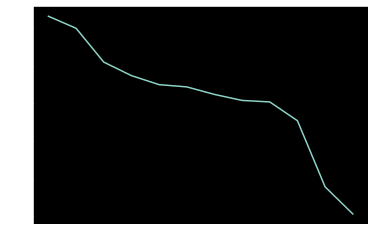

In [42]:
import matplotlib.pyplot as pyplot

pyplot.plot(chrome_points)


In [43]:
#qualcomm
#mozilla
#apple
#microsoft
#
chrome_points = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()


In [44]:
#qualcomm
#mozilla
#apple
#microsoft
#
chrome_points = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
chrome_points


2008      3
2009     39
2010    152
2011    266
2012    250
2013    175
2014    127
2015    187
2016    172
2017    154
2018    162
2019    205
Name: publishedDate, dtype: int64

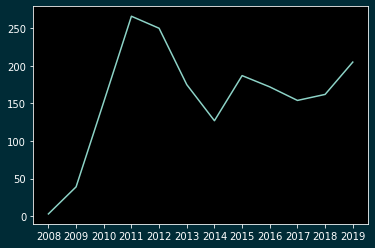

In [45]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(chrome_points)
pyplot.show()


In [46]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(chrome_points, color='b', label='Chrome')
pyplot.plot(firefox_points, color='r', label='Firefox')
pyplot.legend()
pyplot.show()


NameError: name 'firefox_points' is not defined

In [47]:
#qualcomm
#mozilla
#apple
#microsoft
#
chrome_points = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()

firefox_points = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()


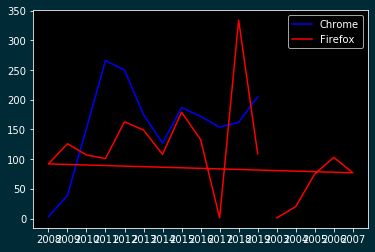

In [48]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(chrome_points, color='b', label='Chrome')
pyplot.plot(firefox_points, color='r', label='Firefox')
pyplot.legend()
pyplot.show()


In [49]:
firefox_points


2003      1
2004     20
2005     75
2006    103
2007     77
2008     92
2009    126
2010    107
2011    101
2012    163
2013    149
2014    108
2015    179
2016    133
2017      1
2018    334
2019    109
Name: publishedDate, dtype: int64

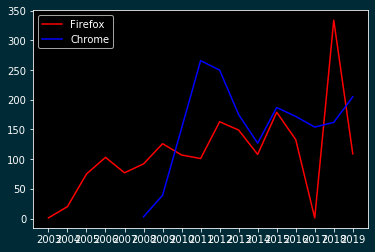

In [50]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(firefox_points, color='r', label='Firefox')
pyplot.plot(chrome_points, color='b', label='Chrome')
pyplot.legend()
pyplot.show()


In [51]:
df[(df['product']==':safari') & (df['vendor']==':apple')].groupby('cve.CVE_data_meta.ID').first()

,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2003-0355,2003-06-09T04:00Z,2008-09-05T20:34Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.securityfocus.com/archive...,"[{'lang': 'en', 'value': 'Safari 1.0 Beta 2 (v...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ap...",cpe:2.3:a:apple:safari:1.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:apple,:safari,:1.0:*:*:*:*:*:*:*
CVE-2003-0370,2003-06-16T04:00Z,2008-09-10T19:18Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://lists.grok.org.uk/pipermail/f...,"[{'lang': 'en', 'value': 'Konqueror Embedded a...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:P/A:P,NETWORK,LOW,NONE,PARTIAL,PARTIAL,PARTIAL,7.5,HIGH,10.0,6.4,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ap...",cpe:2.3:a:apple:safari:1.0:beta:*:*:*:*:*:*,True,cpe:2.3:,a,:apple,:safari,:1.0:beta:*:*:*:*:*:*
CVE-2003-0514,2004-04-15T04:00Z,2008-09-05T20:34Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://archives.neohapsis.com/archiv...,"[{'lang': 'en', 'value': 'Apple Safari allows ...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:P/A:P,NETWORK,LOW,NONE,PARTIAL,PARTIAL,PARTIAL,7.5,HIGH,10.0,6.4,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ap...",cpe:2.3:a:apple:safari:1.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:apple,:safari,:1.0:*:*:*:*:*:*:*
CVE-2003-0975,2003-12-15T05:00Z,2017-07-11T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://docs.info.apple.com/article.h...,"[{'lang': 'en', 'value': 'Apple Safari 1.0 thr...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:N/A:N,NETWORK,LOW,NONE,PARTIAL,NONE,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:ap...",cpe:2.3:a:apple:safari:1.0:

In [52]:
df[(df['vendor']==':microsoft')].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-1999-0007,1998-06-26T04:00Z,2018-10-12T21:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'https://docs.microsoft.com/en-us/sec...,"[{'lang': 'en', 'value': 'Information from SSL...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:N/A:N,NETWORK,LOW,NONE,PARTIAL,NONE,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:exchange_server:5.5:*:*:*:...,True,cpe:2.3:,a,:microsoft,:exchange_server,:5.5:*:*:*:*:*:*:*
CVE-1999-0012,1998-02-06T05:00Z,2008-09-09T12:33Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[],"[{'lang': 'en', 'value': 'Some web servers und...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:N/A:N,NETWORK,LOW,NONE,PARTIAL,NONE,NONE,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:frontpage:*:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:frontpage,:*:*:*:*:*:*:*:*
CVE-1999-0015,1997-12-16T05:00Z,2018-05-03T01:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'https://oval.cisecurity.org/reposito...,"[{'lang': 'en', 'value': 'Teardrop IP denial o...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:o:mi...",cpe:2.3:o:microsoft:windows_95:0.0a:*:*:*:*:*:*:*,True,cpe:2.3:,o,:microsoft,:windows_95,:0.0a:*:*:*:*:*:*:*
CVE-1999-0016,1997-12-01T05:00Z,2008-09-09T12:33Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www1.itrc.hp.com/service/cki/...,"[{'lang': 'en', 'value': 'Land IP denial of se...",4.0,"{'operator': 'AND', 'children': [{'operator': ...",2.0,AV:N/AC:L/Au:N/C:N/I:N/A:P,NETWORK,LOW,NONE,NONE,NONE,PARTIAL,5.0,MEDIUM,10.0,2.9,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:winsock:2.0:*:*:*

In [53]:
df[(df['product']==':ie') & (df['vendor']==':microsoft')].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-1999-0031,1997-07-08T04:00Z,2008-09-09T12:33Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'http://www.codetalker.com/advisories...,"[{'lang': 'en', 'value': 'JavaScript in Intern...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:H/Au:N/C:P/I:N/A:N,NETWORK,HIGH,NONE,PARTIAL,NONE,NONE,2.6,LOW,4.9,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:ie:3.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:ie,:3.0:*:*:*:*:*:*:*
CVE-1999-0280,1997-04-01T05:00Z,2008-09-09T12:34Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[],"[{'lang': 'en', 'value': 'Remote command execu...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:P/A:P,NETWORK,LOW,NONE,PARTIAL,PARTIAL,PARTIAL,7.5,HIGH,10.0,6.4,False,True,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:ie:3.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:ie,:3.0:*:*:*:*:*:*:*
CVE-1999-0331,1998-01-01T05:00Z,2008-09-09T12:34Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[],"[{'lang': 'en', 'value': 'Buffer overflow in I...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:P/A:P,NETWORK,LOW,NONE,PARTIAL,PARTIAL,PARTIAL,7.5,HIGH,10.0,6.4,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:ie:3.0.2:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:ie,:3.0.2:*:*:*:*:*:*:*
CVE-1999-0354,1999-11-01T05:00Z,2018-10-12T21:29Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'NVD...",[{'url': 'https://docs.microsoft.com/en-us/sec...,"[{'lang': 'en', 'value': 'Internet Explorer 4....",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:L/Au:N/C:P/I:P/A:P,NETWORK,LOW,NONE,PARTIAL,PARTIAL,PARTIAL,7.5,HIGH,10.0,6.4,False,False,True,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:ie:4.0:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:ie,:4.0:*:*:*:*:*:*:*
CVE-1999-0468,1999-04-09T04:00Z,20

In [54]:
df[(df['product']==':edge') & (df['vendor']==':microsoft')].groupby('cve.CVE_data_meta.ID').first()


,publishedDate,lastModifiedDate,cve.data_type,cve.data_format,cve.data_version,cve.CVE_data_meta.ASSIGNER,cve.problemtype.problemtype_data,cve.references.reference_data,cve.description.description_data,configurations.CVE_data_version,configurations.nodes,impact.baseMetricV2.cvssV2.version,impact.baseMetricV2.cvssV2.vectorString,impact.baseMetricV2.cvssV2.accessVector,impact.baseMetricV2.cvssV2.accessComplexity,impact.baseMetricV2.cvssV2.authentication,impact.baseMetricV2.cvssV2.confidentialityImpact,impact.baseMetricV2.cvssV2.integrityImpact,impact.baseMetricV2.cvssV2.availabilityImpact,impact.baseMetricV2.cvssV2.baseScore,impact.baseMetricV2.severity,impact.baseMetricV2.exploitabilityScore,impact.baseMetricV2.impactScore,impact.baseMetricV2.obtainAllPrivilege,impact.baseMetricV2.obtainUserPrivilege,impact.baseMetricV2.obtainOtherPrivilege,impact.baseMetricV2.userInteractionRequired,impact.baseMetricV2.acInsufInfo,impact.baseMetricV3.cvssV3.version,impact.baseMetricV3.cvssV3.vectorString,impact.baseMetricV3.cvssV3.attackVector,impact.baseMetricV3.cvssV3.attackComplexity,impact.baseMetricV3.cvssV3.privilegesRequired,impact.baseMetricV3.cvssV3.userInteraction,impact.baseMetricV3.cvssV3.scope,impact.baseMetricV3.cvssV3.confidentialityImpact,impact.baseMetricV3.cvssV3.integrityImpact,impact.baseMetricV3.cvssV3.availabilityImpact,impact.baseMetricV3.cvssV3.baseScore,impact.baseMetricV3.cvssV3.baseSeverity,impact.baseMetricV3.exploitabilityScore,impact.baseMetricV3.impactScore,cpe_match,cpe23Uri,vulnerable,cpe_version,part,vendor,product,additional_fields
cve.CVE_data_meta.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CVE-2015-2441,2015-08-14T10:59Z,2018-10-12T22:09Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securitytracker.com/id/10...,"[{'lang': 'en', 'value': 'Microsoft Internet E...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:C/I:C/A:C,NETWORK,MEDIUM,NONE,COMPLETE,COMPLETE,COMPLETE,9.3,HIGH,8.6,10.0,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:edge:-:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:edge,:-:*:*:*:*:*:*:*
CVE-2015-2442,2015-08-14T10:59Z,2018-10-12T22:09Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securitytracker.com/id/10...,"[{'lang': 'en', 'value': 'Microsoft Internet E...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:C/I:C/A:C,NETWORK,MEDIUM,NONE,COMPLETE,COMPLETE,COMPLETE,9.3,HIGH,8.6,10.0,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:edge:-:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:edge,:-:*:*:*:*:*:*:*
CVE-2015-2446,2015-08-14T10:59Z,2018-10-12T22:09Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securitytracker.com/id/10...,"[{'lang': 'en', 'value': 'Microsoft Internet E...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:C/I:C/A:C,NETWORK,MEDIUM,NONE,COMPLETE,COMPLETE,COMPLETE,9.3,HIGH,8.6,10.0,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:microsoft:edge:-:*:*:*:*:*:*:*,True,cpe:2.3:,a,:microsoft,:edge,:-:*:*:*:*:*:*:*
CVE-2015-2449,2015-08-14T10:59Z,2018-10-12T22:09Z,CVE,MITRE,4.0,cve@mitre.org,"[{'description': [{'lang': 'en', 'value': 'CWE...",[{'url': 'http://www.securitytracker.com/id/10...,"[{'lang': 'en', 'value': 'Microsoft Internet E...",4.0,"{'operator': 'OR', 'cpe_match': [{'vulnerable'...",2.0,AV:N/AC:M/Au:N/C:P/I:N/A:N,NETWORK,MEDIUM,NONE,PARTIAL,NONE,NONE,4.3,MEDIUM,8.6,2.9,False,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"{'vulnerable': True, 'cpe23Uri': 'cpe:2.3:a:mi...",cpe:2.3:a:mi

In [55]:
ie_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()

In [56]:
edge_points = df[(df['product']==':edge') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()


In [57]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(firefox_points, color='r', label='Firefox')
pyplot.plot(chrome_points, color='b', label='Chrome')
pyplot.plot(safari_points, color='g', label='Safari')
pyplot.plot(ie_points, color='turqoise', label='Internet Explorer')
pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


NameError: name 'safari_points' is not defined

In [58]:
safari_points = df[(df['product']==':safari') & (df['vendor']==':apple') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()


In [59]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(firefox_points, color='r', label='Firefox')
pyplot.plot(chrome_points, color='b', label='Chrome')
pyplot.plot(safari_points, color='g', label='Safari')
pyplot.plot(ie_points, color='turqoise', label='Internet Explorer')
pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


ValueError: Invalid RGBA argument: 'turqoise'

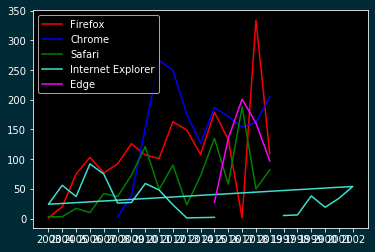

In [60]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(firefox_points, color='r', label='Firefox')
pyplot.plot(chrome_points, color='b', label='Chrome')
pyplot.plot(safari_points, color='g', label='Safari')
pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


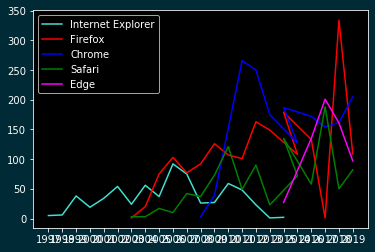

In [61]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
pyplot.plot(firefox_points, color='r', label='Firefox')
pyplot.plot(chrome_points, color='b', label='Chrome')
pyplot.plot(safari_points, color='g', label='Safari')
pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


In [62]:
safari_points


2003      3
2004      3
2005     17
2006     10
2007     42
2008     37
2009     73
2010    121
2011     49
2012     90
2013     23
2014     72
2015    135
2016     58
2017    188
2018     50
2019     82
Name: publishedDate, dtype: int64

In [63]:
ie_points


1997     5
1998     6
1999    38
2000    19
2001    34
2002    54
2003    24
2004    56
2005    37
2006    92
2007    75
2008    26
2009    27
2010    59
2011    48
2012    23
2013     1
2015     2
Name: publishedDate, dtype: int64

In [64]:

# This could be done more elegantly
years = range(1996, 2021)
ie_ys = []
for year in years:
	if year in ie_points:
		ie_ys.append(ie_points[year])
	else:
		ie_ys.append(0)

ie_ys


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [65]:

# This could be done more elegantly
years = range(1996, 2021)
ie_ys = []
for year in years:
	if ie_points[year] != 0:
		ie_ys.append(ie_points[year])
	else:
		ie_ys.append(0)

ie_ys


IndexError: index out of bounds

In [66]:

# This could be done more elegantly
years = range(1996, 2021)
ie_ys = []
for year in years:
	if year in ie_points.index:
		ie_ys.append(ie_points[year])
	else:
		ie_ys.append(0)

ie_ys


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [67]:

# This could be done more elegantly
years = range(1996, 2021)
ie_ys = []
for year in years:
	if year in ie_points.index:
		ie_ys.append(ie_points[year])
	else:
		ie_ys.append(0)

ie_points[2001]


IndexError: index out of bounds

In [68]:

# This could be done more elegantly
years = range(1996, 2021)
ie_ys = []
for year in years:
	if year in ie_points.index:
		ie_ys.append(ie_points[year])
	else:
		ie_ys.append(0)

ie_points['2001']


34

In [69]:

# This could be done more elegantly
years = range(1996, 2021)
ie_ys = []
for year in years:
	if str(year) in ie_points:
		ie_ys.append(ie_points[str(year)])
	else:
		ie_ys.append(0)

ie_ys


[0,
 5,
 6,
 38,
 19,
 34,
 54,
 24,
 56,
 37,
 92,
 75,
 26,
 27,
 59,
 48,
 23,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0]

In [70]:

# This could be done more elegantly
years = range(1996, 2021)
browser_ys = {	'Chrome': [chrome_points, []],
				'Firefox': [firefox_points, []],
				'Internet Explorer': [ie_points, []],
				'Safari': [safari_points, []],
				'Edge': [edge_points, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

browser_ys['Firefox'][1]


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 20,
 75,
 103,
 77,
 92,
 126,
 107,
 101,
 163,
 149,
 108,
 179,
 133,
 1,
 334,
 109,
 0]

In [71]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


IndexError: list index out of range

In [72]:

# This could be done more elegantly
years = range(1996, 2021)
browser_ys = {	'Chrome': [chrome_points, [], 'b'],
				'Firefox': [firefox_points, [], 'r'],
				'Internet Explorer': [ie_points, [], 'white'],
				'Safari': [safari_points, [], 'g'],
				'Edge': [edge_points, [], 'magenta']}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

browser_ys['Firefox'][1]


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 20,
 75,
 103,
 77,
 92,
 126,
 107,
 101,
 163,
 149,
 108,
 179,
 133,
 1,
 334,
 109,
 0]

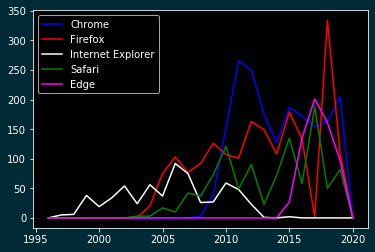

In [73]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


In [74]:
firefox_points = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['cve.CVE_data_meta.ID'].str[4:9].value_counts().sort_index()


KeyError: 'cve.CVE_data_meta.ID'

In [75]:
firefox_points


2003      1
2004     20
2005     75
2006    103
2007     77
2008     92
2009    126
2010    107
2011    101
2012    163
2013    149
2014    108
2015    179
2016    133
2017      1
2018    334
2019    109
Name: publishedDate, dtype: int64

In [76]:
firefox_points = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index
#.str[4:9].value_counts()


In [77]:
firefox_points


Index(['CVE-2002-2436', 'CVE-2002-2437', 'CVE-2003-1492', 'CVE-2004-0648', 'CVE-2004-0757', 'CVE-2004-0761', 'CVE-2004-0762', 'CVE-2004-0763', 'CVE-2004-0764', 'CVE-2004-0765',
       ...
       'CVE-2019-9811', 'CVE-2019-9813', 'CVE-2019-9814', 'CVE-2019-9815', 'CVE-2019-9816', 'CVE-2019-9817', 'CVE-2019-9818', 'CVE-2019-9819', 'CVE-2019-9820', 'CVE-2019-9821'], dtype='object', name='cve.CVE_data_meta.ID', length=1878)

In [78]:
# firefox_points = 
df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:9]
#.str[4:9].value_counts()


Index(['2002-', '2002-', '2003-', '2004-', '2004-', '2004-', '2004-', '2004-', '2004-', '2004-',
       ...
       '2019-', '2019-', '2019-', '2019-', '2019-', '2019-', '2019-', '2019-', '2019-', '2019-'], dtype='object', name='cve.CVE_data_meta.ID', length=1878)

In [79]:
# firefox_points = 
df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8]
#.str[4:9].value_counts()


Index(['2002', '2002', '2003', '2004', '2004', '2004', '2004', '2004', '2004', '2004',
       ...
       '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019', '2019'], dtype='object', name='cve.CVE_data_meta.ID', length=1878)

In [80]:
# firefox_points = 
df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts()
#.str[4:9].value_counts()


2017    186
2016    176
2015    171
2012    159
2013    150
2018    145
2009    128
2014    117
2010    104
2006    104
2011    101
2008     94
2007     78
2005     75
2019     67
2004     20
2002      2
2003      1
Name: cve.CVE_data_meta.ID, dtype: int64

In [81]:
# firefox_points = 
df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()
#.str[4:9].value_counts()


2002      2
2003      1
2004     20
2005     75
2006    104
2007     78
2008     94
2009    128
2010    104
2011    101
2012    159
2013    150
2014    117
2015    171
2016    176
2017    186
2018    145
2019     67
Name: cve.CVE_data_meta.ID, dtype: int64

In [82]:
# publishedDate has the wrong data for Firefox
# so we use the year in the CVE ID instead
firefox_points = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

firefox_points_awry = df[(df['product']==':firefox') & (df['vendor']==':mozilla') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
#.str[4:9].value_counts()


In [83]:
firefox_points


2002      2
2003      1
2004     20
2005     75
2006    104
2007     78
2008     94
2009    128
2010    104
2011    101
2012    159
2013    150
2014    117
2015    171
2016    176
2017    186
2018    145
2019     67
Name: cve.CVE_data_meta.ID, dtype: int64

In [84]:
firefox_points_awry


2003      1
2004     20
2005     75
2006    103
2007     77
2008     92
2009    126
2010    107
2011    101
2012    163
2013    149
2014    108
2015    179
2016    133
2017      1
2018    334
2019    109
Name: publishedDate, dtype: int64

In [85]:
#qualcomm
#mozilla
#apple
#microsoft
#
chrome_points_awry = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()

chrome_points = df[(df['product']==':chrome') & (df['vendor']==':google') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [86]:
safari_points_awry = df[(df['product']==':safari') & (df['vendor']==':apple') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
safari_points = df[(df['product']==':safari') & (df['vendor']==':apple') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [87]:
ie_points_awry = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
ie_points = df[(df['product']==':ie') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()

In [88]:
edge_points_awry = df[(df['product']==':edge') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first()['publishedDate'].str[:4].value_counts().sort_index()
edge_points = df[(df['product']==':edge') & (df['vendor']==':microsoft') & (df['vulnerable']==True)].groupby('cve.CVE_data_meta.ID').first().index.str[4:8].value_counts().sort_index()


In [89]:

# This could be done more elegantly
years = range(1996, 2021)
browser_ys = {	'Chrome': [chrome_points, [], 'b'],
				'Firefox': [firefox_points, [], 'r'],
				'Internet Explorer': [ie_points, [], 'white'],
				'Safari': [safari_points, [], 'g'],
				'Edge': [edge_points, [], 'magenta']}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

browser_ys['Firefox'][1]


[0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 20,
 75,
 104,
 78,
 94,
 128,
 104,
 101,
 159,
 150,
 117,
 171,
 176,
 186,
 145,
 67,
 0]

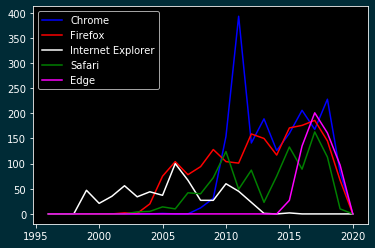

In [90]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


In [91]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b'],
				'Firefox': [firefox_points, [], 'r'],
				'Internet Explorer': [ie_points, [], 'white'],
				'Safari': [safari_points, [], 'g'],
				'Edge': [edge_points, [], 'magenta']}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

browser_ys['Firefox'][1]


[0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 20,
 75,
 104,
 78,
 94,
 128,
 104,
 101,
 159,
 150,
 117,
 171,
 176,
 186,
 145,
 67]

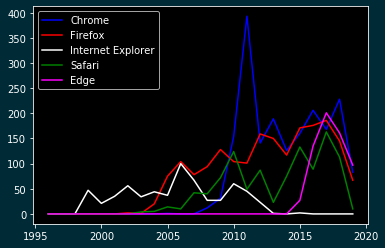

In [92]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.show()


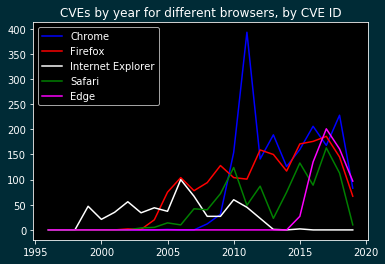

IndexError: list index out of range

In [93]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.show()


In [94]:

# This could be done more elegantly
years = range(1996, 2020)
browser_ys = {	'Chrome': [chrome_points, [], 'b', chrome_points_awry, []],
				'Firefox': [firefox_points, [], 'r', firefox_points_awry, []],
				'Internet Explorer': [ie_points, [], 'white', ie_points_awry, []],
				'Safari': [safari_points, [], 'g', safari_points_awry, []],
				'Edge': [edge_points, [], 'magenta', edge_points_awry, []]}
for browser in browser_ys:
	for year in years:
		if str(year) in browser_ys[browser][0]:
			browser_ys[browser][1].append(browser_ys[browser][0][str(year)])
		else:
			browser_ys[browser][1].append(0)

		if str(year) in browser_ys[browser][3]:
			browser_ys[browser][4].append(browser_ys[browser][3][str(year)])
		else:
			browser_ys[browser][4].append(0)

browser_ys['Firefox'][1]


[0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 20,
 75,
 104,
 78,
 94,
 128,
 104,
 101,
 159,
 150,
 117,
 171,
 176,
 186,
 145,
 67]

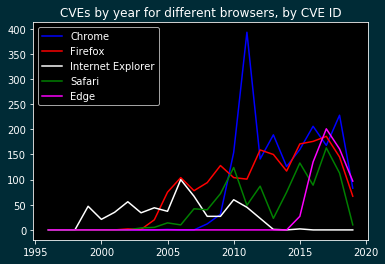

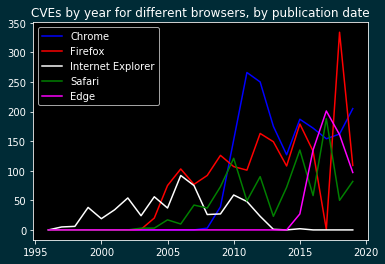

In [95]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.show()


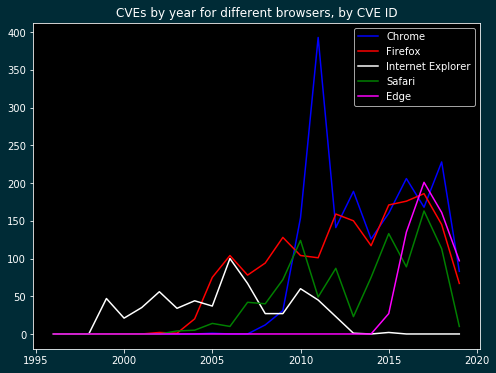

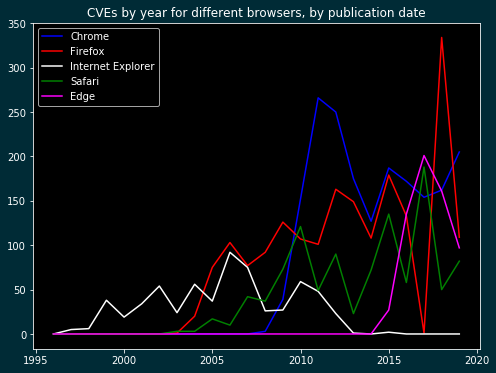

In [96]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
figure = pyplot.gcf()
figure.set_size_inches((8,6))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
figure = pyplot.gcf()
figure.set_size_inches((8,6))
pyplot.show()


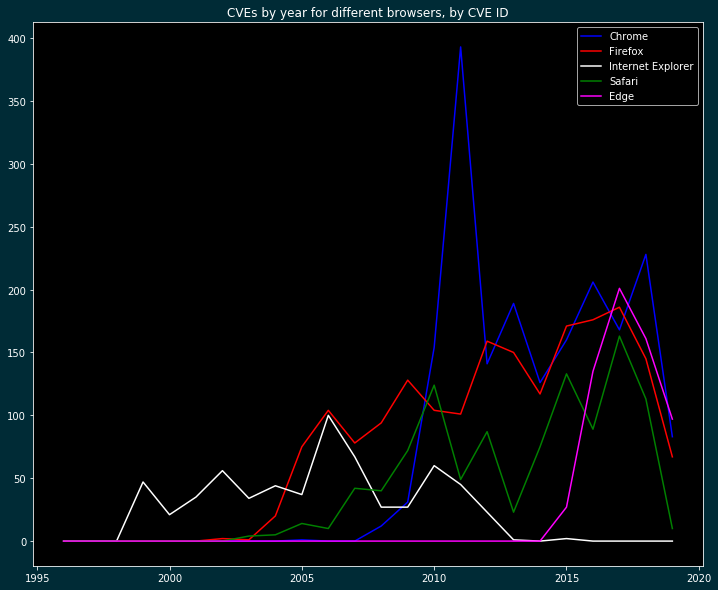

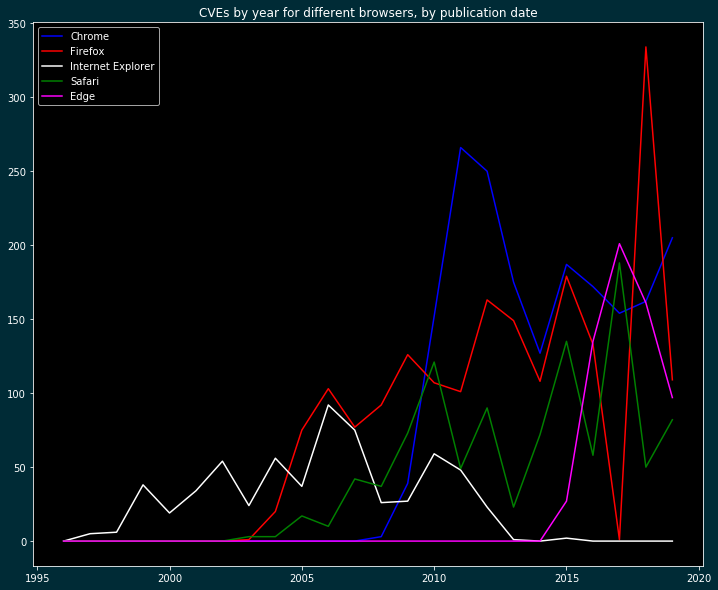

In [97]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()


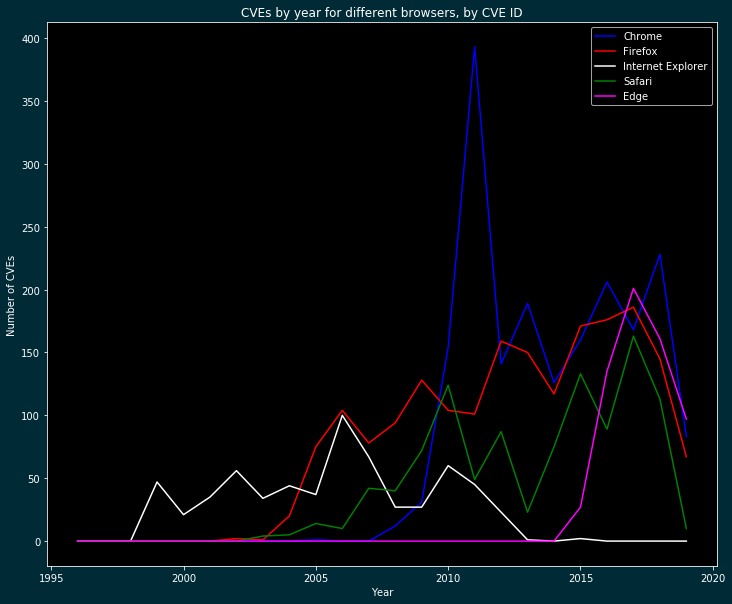

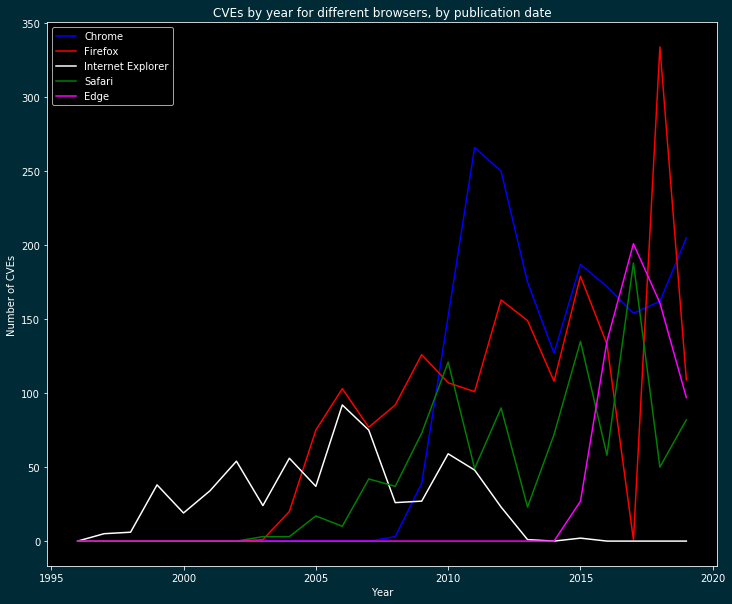

In [98]:
import matplotlib.pyplot as pyplot
pyplot.rcParams['figure.facecolor'] = '#002B36'
pyplot.rcParams['axes.facecolor'] = 'black'

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][1], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by CVE ID')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()

for browser in browser_ys:
	pyplot.plot(years, browser_ys[browser][4], browser_ys[browser][2], label=browser)
# pyplot.plot(ie_points, color='turquoise', label='Internet Explorer')
# pyplot.plot(firefox_points, color='r', label='Firefox')
# pyplot.plot(chrome_points, color='b', label='Chrome')
# pyplot.plot(safari_points, color='g', label='Safari')
# pyplot.plot(edge_points, color='magenta', label='Edge')
pyplot.legend()
pyplot.title('CVEs by year for different browsers, by publication date')
pyplot.xlabel('Year')
pyplot.ylabel('Number of CVEs')
figure = pyplot.gcf()
figure.set_size_inches((12,10))
pyplot.show()
